In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sc
import panel as pn
pn.extension()
import hvplot as hv
import hvplot.pandas


In [2]:
#Read the data  and convert it into data frame
data = pd.read_csv("owid-co2.csv")
df = pd.DataFrame(data)
df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23915,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
23916,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
23917,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
23918,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


#### Data Realization
- IN this step we will know various accept our data. and check whether all the data we wanted in our 
dataset are uploaded in the notebook or not 
- WIth that we will check how many datas are missing on what column and will prepare the statrgey 
for handeling missing values accordingly.



In [3]:
df.columns #check column names

Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'trade_co2',
       'cement_co2', 'cement_co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_industry_co2', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_gdp', 'co2_per_unit_energy',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share',
       'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [4]:
df.dtypes # validate datatype

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
co2_per_capita                         float64
trade_co2                              float64
cement_co2                             float64
cement_co2_per_capita                  float64
coal_co2                               float64
coal_co2_per_capita                    float64
flaring_co2                            float64
flaring_co2_per_capita                 float64
gas_co2                                float64
gas_co2_per_capita                     float64
oil_co2                                float64
oil_co2_per_capita                     float64
other_industry_co2                     float64
other_co2_per_capita                   float64
co2_growth_prct                        float64
co2_growth_abs                         float64
co2_per_gdp                            float64
co2_per_unit_

In [5]:
df.head()  #print first 5 data

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [6]:
df.tail() # print lst 5 rows of data

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23915,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
23916,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
23917,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
23918,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN
23919,ZWE,Zimbabwe,2020,10.531,0.709,NaN,0.697,0.047,6.257,0.421,...,NaN,NaN,NaN,NaN,NaN,14862927.0,NaN,NaN,NaN,NaN


In [7]:
df.describe(include="all") # statistics

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,21947,23920,23920.000000,23002.000000,22590.000000,3916.000000,12033.000000,12033.000000,16437.000000,16221.000000,...,5594.000000,5597.000000,5597.000000,5597.000000,5597.000000,2.270300e+04,1.346900e+04,9167.000000,9134.000000,7149.000000
unique,218,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OWID_WRL,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,271,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1954.001171,290.910278,4.167969,-12.054490,14.334682,0.111604,191.837620,1.516169,...,6.882191,77.388506,1.913990,28.026160,0.604045,7.126582e+07,2.889570e+11,1354.577508,24537.121700,1.805888
std,NaN,NaN,52.433956,1693.303049,15.139243,246.160846,85.189588,0.150132,882.102461,2.584057,...,7.295876,547.006921,3.333148,198.424009,0.894235,3.809955e+08,2.185599e+12,8756.140204,32329.304946,1.779325
min,NaN,NaN,1750.000000,0.000000,0.000000,-2232.999000,0.000000,0.000000,0.000000,0.000000,...,0.405000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.078000
25%,NaN,NaN,1926.000000,0.535000,0.242000,-0.944500,0.124000,0.018000,0.315000,0.051000,...,2.106250,2.050000,0.694000,0.530000,0.222000,1.360852e+06,9.790110e+09,6.540500,2969.947000,0.859000
50%,NaN,NaN,1967.000000,4.730500,1.164000,1.899500,0.532000,0.066000,3.631000,0.380000,...,4.439500,8.530000,1.085000,3.460000,0.377000,4.962839e+06,3.044678e+10,55.572000,12761.570500,1.309000
75%,NaN,NaN,1994.000000,40.033500,4.605750,8.996000,2.650000,0.153000,31.327000,1.941000,...,8.947500,29.480000,1.628000,10.950000,0.589000,1.785012e+07,1.274620e+11,325.266500,34002.941250,2.203000


In [8]:
#isnull() ---> returns True value when there is null value. and notnull() returns true when there is no missing value. 
missing_data = df.isnull()
missing_data.head(5)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,False,False,False,False,False,True,True,True,False,False,...,True,True,True,True,True,False,True,True,True,True
1,False,False,False,False,False,True,True,True,False,False,...,True,True,True,True,True,False,False,True,True,True
2,False,False,False,False,False,True,True,True,False,False,...,True,True,True,True,True,False,False,True,True,True
3,False,False,False,False,False,True,True,True,False,False,...,True,True,True,True,True,False,False,True,True,True
4,False,False,False,False,False,True,True,True,False,False,...,True,True,True,True,True,False,False,True,True,True


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

iso_code
False    21947
True      1973
Name: iso_code, dtype: int64

country
False    23920
Name: country, dtype: int64

year
False    23920
Name: year, dtype: int64

co2
False    23002
True       918
Name: co2, dtype: int64

co2_per_capita
False    22590
True      1330
Name: co2_per_capita, dtype: int64

trade_co2
True     20004
False     3916
Name: trade_co2, dtype: int64

cement_co2
False    12033
True     11887
Name: cement_co2, dtype: int64

cement_co2_per_capita
False    12033
True     11887
Name: cement_co2_per_capita, dtype: int64

coal_co2
False    16437
True      7483
Name: coal_co2, dtype: int64

coal_co2_per_capita
False    16221
True      7699
Name: coal_co2_per_capita, dtype: int64

flaring_co2
True     19638
False     4282
Name: flaring_co2, dtype: int64

flaring_co2_per_capita
True     19638
False     4282
Name: flaring_co2_per_capita, dtype: int64

gas_co2
True     15343
False     8577
Name: gas_co2, dtype: int64

gas_co2_per_capita
True     15343
False     8577
Name: 

The above o/p shows us which column has how many missing value . if the ratio of true and false is less than 0.011 then will drop the values other wise we will change the value as mean value. As seen in data iso_code, country, year has no missing vale. 

### Data Processing
- Co2,Co2_growth_prct, population has really low no of missing values. removing these value won't cause any harm on our data set
- Co2 and gfg is our target variable 
- fill the co2_percapita by dividing the value with population
- create column gdp_pecapita

In [10]:
# simply drop whole row with NaN in "co2" column
df.dropna( subset =["co2"] , axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [11]:
# simply drop whole row with NaN in "co2" column
df.dropna(subset=["co2_growth_prct"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [12]:
df['gdp']= df['gdp'].fillna(0)
df['total_ghg'] = df['total_ghg'].fillna(0)

In [13]:
#calculate the most frequent df['share_global_cumulative_co2'] value with idxmax() function

share_global_cumulative_co2 = df['share_global_cumulative_co2'].value_counts().idxmax()
share_global_cumulative_co2


0.0

In [14]:
#fill the na value with most frequent value 
df['share_global_cumulative_co2']= df['share_global_cumulative_co2'].fillna(share_global_cumulative_co2)
df['share_global_cumulative_co2']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
22768    0.05
22769    0.05
22770    0.05
22771    0.05
22772    0.05
Name: share_global_cumulative_co2, Length: 22773, dtype: float64

In [15]:
# fill the gd with forward fill method
df['share_global_oil_co2'] = df['share_global_oil_co2'].fillna(method = "ffill")
df['population'] = df['population'].fillna(0)


In [16]:
#fill na value value with mean value of series 
coal_co2 = df['coal_co2'].mean()
df['coal_co2'] = df['coal_co2'].fillna(coal_co2)                                
df['flaring_co2'] = df['flaring_co2'].replace(np.nan,0)
df['gas_co2'] = df['gas_co2'].replace(np.nan,0)
df['oil_co2'] = df['oil_co2'].replace(np.nan,0)
df['consumption_co2'] = df['consumption_co2'].fillna(0)
df['cumulative_co2'] = df['cumulative_co2'].fillna(df['cumulative_co2'].mean())





In [17]:
df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
1,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
3,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1954,0.106,0.013,NaN,NaN,NaN,0.043,0.005,...,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22768,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
22769,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
22770,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
22771,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,0.000000e+00,49.427,3374.877,NaN


In [18]:
df['share_global_cumulative_flaring_co2'] = df['share_global_cumulative_flaring_co2'].replace(np.nan,0)
df['trade_co2'] = df['trade_co2'].replace(np.nan,0.14) # 0.14 is the mean value rounded up
df['cement_co2'] = df['cement_co2'].replace(np.nan,0)
df['primary_energy_consumption']=df['primary_energy_consumption'].interpolate()
df['primary_energy_consumption'] = df['primary_energy_consumption'].replace(np.NaN,0)
df['other_industry_co2'] = df['other_industry_co2'].fillna(0)
df['cumulative_cement_co2'] = df['cumulative_cement_co2'].fillna(0)
df['cumulative_coal_co2'] = df['cumulative_coal_co2'].fillna(0)
df['cumulative_gas_co2'] = df['cumulative_gas_co2'].fillna(0)
df['cumulative_flaring_co2'] = df['cumulative_flaring_co2'].fillna(0)
df['cumulative_oil_co2'] = df['cumulative_oil_co2'].fillna(0)
df['cumulative_other_co2'] =df['cumulative_other_co2'].fillna(0)
df['consumption_co2'] = df['consumption_co2'].fillna(0)
df['cumulative_co2'] = df['cumulative_co2'].fillna(0)


In [19]:
df['methane'] = df['methane'].fillna(method ="ffill")
df['methane']= df['methane'].fillna(0)
df['nitrous_oxide'] = df['nitrous_oxide'].fillna(method ="ffill")
df['nitrous_oxide'] = df['nitrous_oxide'].fillna(0)
df['methane_per_capita'] = np.where(df['population']!=0,df['methane']/df['population'],0)
df['nitrous_oxide_per_capita'] =np.where(df['population']!=0,df['nitrous_oxide']/df['population'],0)
df['energy_per_capita'] = np.where(df['population']!=0,df['primary_energy_consumption']/df['population'],0)
df['energy_per_gdp'] = np.where(df['gdp']!=0,df['primary_energy_consumption']/df['gdp'],0)
df['share_global_cumulative_other_co2'] = df['share_global_cumulative_other_co2'].fillna(0)
df['share_global_cumulative_gas_co2'] =df['share_global_cumulative_gas_co2'].fillna(0)
df['total_ghg'] = df['total_ghg'].fillna(0)
df['total_ghg_excluding_lucf'] = df['total_ghg_excluding_lucf'].fillna(0)
df['share_global_other_co2'] = df['share_global_other_co2'].fillna(0)
df['share_global_gas_co2'] = df['share_global_gas_co2'].fillna(0)
df['share_global_flaring_co2'] =df['share_global_flaring_co2'].fillna(0)
df['trade_co2_share'] = df['trade_co2_share'].fillna(0)
df['share_global_cumulative_coal_co2'] = df['share_global_cumulative_coal_co2'].fillna(0)
df['share_global_cumulative_cement_co2'] = df['share_global_cumulative_cement_co2'].fillna(0)


In [20]:
df['coal_co2_per_capita'] = np.where(df['population']!=0,df['coal_co2']/df['population'],0)
df['flaring_co2_per_capita'] = np.where(df['population'],df['flaring_co2']/df['population'],0)
df['gas_co2_per_capita'] = np.where(df['population']!=0, df['gas_co2']/df['population'],0)
df['oil_co2_per_capita'] = np.where(df['population']!=0,df['oil_co2']/df['population'],0)
df['other_co2_per_capita'] = np.where(df['population']!=0,df['other_industry_co2']/df['population'],0)
df['co2_per_unit_energy'] = np.where(df['primary_energy_consumption']!=0,df['co2']/df['primary_energy_consumption'],0)
df['consumption_co2_per_capita'] = np.where(df['population']!=0,df['consumption_co2']/df['population'],0)
df['consumption_co2_per_gdp'] = np.where(df['gdp']!=0, df['consumption_co2']/df['gdp'], 0)
df['gdp_per_capita'] =np.where(df['population']!=0, df['gdp']/df['population'],0)
df['co2_per_gdp'] =np.where(df['gdp']!=0, df['co2']/df['gdp'], 0)
df['co2_per_capita'] = np.where(df['population']!=0,df['co2']/df['population'],0)
df['cement_co2_per_capita'] =np.where(df['population']!=0, df['cement_co2']/df['population'],0)
df['ghg_per_capita'] = np.where(df['population']!=0, df['total_ghg']/df['population'],0)
df['ghg_excluding_lucf_per_capita'] = np.where(df['population']!=0, df['total_ghg_excluding_lucf']/df['population'],0)


In [21]:
df.dropna(subset=["co2_growth_abs"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

change the data type of year to object

## Exploratory Data Analysis

In [22]:
# define the statistic after cleaning
df.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,gdp_per_capita
count,22648.000000,22648.000000,2.264800e+04,22648.000000,22648.000000,2.264800e+04,22648.000000,2.264800e+04,22648.000000,2.264800e+04,...,22648.000000,2.264800e+04,22648.000000,2.264800e+04,2.264800e+04,2.264800e+04,22648.000000,22648.000000,2.264800e+04,22648.000000
mean,1957.205095,295.446059,4.044758e-06,-1.968508,7.616041,5.795651e-08,194.023208,9.080358e-04,3.077744,1.680181e-07,...,71.120483,1.832224e-04,27.386376,7.755324e-05,7.004707e+07,1.715964e+11,1384.359722,0.001218,3.334860e-08,5115.782956
std,50.189758,1706.093957,1.479295e-05,102.451882,62.504762,1.224288e-07,751.238087,5.816642e-03,19.502275,2.433831e-06,...,459.001024,1.998052e-03,169.245686,7.870670e-04,3.805741e+08,1.691431e+12,7127.218194,0.017331,5.608110e-07,9760.163528
min,1751.000000,0.000000,0.000000e+00,-2232.999000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,1931.000000,0.583000,1.897705e-07,0.140000,0.000000,0.000000e+00,0.912000,7.652767e-08,0.000000,0.000000e+00,...,2.520000,3.569960e-07,0.880000,9.127253e-08,1.045232e+06,0.000000e+00,24.441309,0.000004,0.000000e+00,0.000000
50%,1969.000000,4.976000,1.065638e-06,0.140000,0.017000,5.664507e-10,19.148000,1.171532e-06,0.000000,0.000000e+00,...,9.250000,1.243506e-06,3.620000,4.332817e-07,4.780140e+06,5.040542e+09,113.994185,0.000020,8.101472e-10,1432.025268
75%,1995.000000,41.395250,4.443709e-06,0.140000,0.642250,7.126094e-08,193.197054,1.750269e-05,0.000000,0.000000e+00,...,37.082500,4.770315e-06,13.650000,1.955503e-06,1.738607e+07,4.436401e+10,457.955000,0.000053,2.836261e-09,5725.201594
max,2020.000000,36702.503000,7.488789e-04,2047.575000,1626.371000,2.738062e-06,15062.902000,1.202970e-01,435.034000,9.471057e-05,...,8298.270000,5.371117e-02,3078.270000,2.138387e-02,7.794799e+09,1.136300e+14,161530.754000,0.656824,2.378479e-05,146405.618791


#### observation
- There is a huge gap between max value of co2 and 75 percentile of CO2 there may be some outliers present 
- the huge gap between Cement co2,coal_co2,flaring co2, and all other data  75th percrntile and max value which show possiblity of outlier or an exponential growth


In [23]:
df.shape # define the data

(22648, 61)

###### observation:
- There are 4664 rows of data present with 61 attribute

In [24]:
df.info # gives a  short insight to data

<bound method DataFrame.info of       iso_code      country  year     co2  co2_per_capita  trade_co2  \
0          AFG  Afghanistan  1950   0.084    1.083575e-08      0.140   
1          AFG  Afghanistan  1951   0.092    1.173447e-08      0.140   
2          AFG  Afghanistan  1952   0.092    1.159275e-08      0.140   
3          AFG  Afghanistan  1953   0.106    1.318460e-08      0.140   
4          AFG  Afghanistan  1954   0.106    1.300404e-08      0.140   
...        ...          ...   ...     ...             ...        ...   
22643      ZWE     Zimbabwe  2016  10.738    7.653415e-07      1.415   
22644      ZWE     Zimbabwe  2017   9.582    6.730540e-07      1.666   
22645      ZWE     Zimbabwe  2018  11.854    8.209817e-07      1.308   
22646      ZWE     Zimbabwe  2019  10.949    7.476030e-07      1.473   
22647      ZWE     Zimbabwe  2020  10.531    7.085415e-07      0.140   

       cement_co2  cement_co2_per_capita  coal_co2  coal_co2_per_capita  ...  \
0           0.000      

In [25]:
df.corr() # shows the correlation between differet numerical variable

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,gdp_per_capita
year,1.000000,0.091899,0.108726,-0.020114,0.100506,0.305890,0.100904,0.102468,0.109754,0.027958,...,0.029259,0.037854,0.022413,0.038505,0.009553,0.072115,-0.027458,0.008139,-0.003502,0.298137
co2,0.091899,1.000000,0.015062,-0.141574,0.886883,0.069336,0.957308,-0.026933,0.865544,-0.008147,...,0.415963,-0.015817,0.412652,-0.016998,0.774784,0.365480,0.668572,-0.011965,-0.009999,-0.005925
co2_per_capita,0.108726,0.015062,1.000000,0.007425,0.000865,0.181069,0.020224,0.355025,0.011663,0.197213,...,-0.010389,0.041199,-0.008935,0.141611,-0.011100,0.028726,0.005608,0.455257,-0.013854,0.196661
trade_co2,-0.020114,-0.141574,0.007425,1.000000,-0.426951,-0.021000,-0.283929,0.003192,-0.093713,0.000822,...,-0.053101,0.001877,-0.053658,0.002032,-0.171595,-0.034004,-0.037509,0.001474,0.001167,0.059295
cement_co2,0.100506,0.886883,0.000865,-0.426951,1.000000,0.088585,0.903865,-0.018979,0.751667,-0.006527,...,0.408937,-0.011140,0.410742,-0.011974,0.722362,0.366640,0.556938,-0.008468,-0.007111,-0.015408
cement_co2_per_capita,0.305890,0.069336,0.181069,-0.021000,0.088585,1.000000,0.048683,-0.069924,0.045420,0.055442,...,0.002457,-0.040754,0.000966,-0.044695,0.035575,0.094738,0.030396,-0.031572,-0.023302,0.559355
coal_co2,0.100904,0.957308,0.020224,-0.283929,0.903865,0.048683,1.000000,-0.000137,0.772967,-0.000664,...,0.387018,-0.001286,0.386731,-0.001535,0.774591,0.342670,0.644932,-0.006589,-0.004941,-0.036648
coal_co2_per_capita,0.102468,-0.026933,0.355025,0.003192,-0.018979,-0.069924,-0.000137,1.000000,-0.024361,-0.001236,...,-0.011597,0.319555,-0.010898,0.331249,-0.028663,-0.015765,-0.026690,0.258309,-0.006483,-0.072200
flaring_co2,0.109754,0.865544,0.011663,-0.093713,0.751667,0.045420,0.772967,-0.024361,1.000000,0.038473,...,0.383735,-0.014131,0.375222,-0.015204,0.718162,0.310278,0.598683,-0.010946,-0.009217,-0.004583
flaring_co2_per_capita,0.027958,-0.008147,0.197213,0.000822,-0.006527,0.055442,-0.000664,-0.001236,0.038473,1.000000,...,0.001195,0.006745,0.001766,0.007069,-0.010165,-0.003391,-0.010510,-0.004491,-0.003837,0.177866


In [26]:
df['year'] =df['year'].astype(object)

In [27]:
data_co2 = df[['co2','cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'population','gdp']].corr()
data_co2

,co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,population,gdp
co2,1.000000,0.886883,0.957308,0.865544,0.947824,0.968528,0.837793,0.774784,0.365480
cement_co2,0.886883,1.000000,0.903865,0.751667,0.809386,0.786491,0.914330,0.722362,0.366640
coal_co2,0.957308,0.903865,1.000000,0.772967,0.840522,0.868512,0.836277,0.774591,0.342670
flaring_co2,0.865544,0.751667,0.772967,1.000000,0.851392,0.885472,0.680778,0.718162,0.310278
gas_co2,0.947824,0.809386,0.840522,0.851392,1.000000,0.952977,0.809261,0.675847,0.374476
oil_co2,0.968528,0.786491,0.868512,0.885472,0.952977,1.000000,0.743878,0.729793,0.341288
other_industry_co2,0.837793,0.914330,0.836277,0.680778,0.809261,0.743878,1.000000,0.648937,0.361652
population,0.774784,0.722362,0.774591,0.718162,0.675847,0.729793,0.648937,1.000000,0.320605
gdp,0.365480,0.366640,0.342670,0.310278,0.374476,0.341288,0.361652,0.320605,1.000000


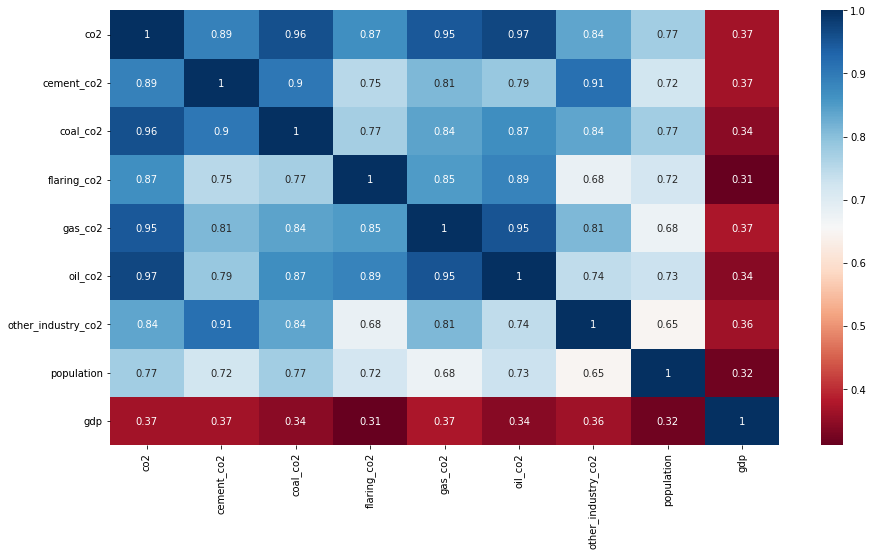

In [28]:
sns.heatmap(data_co2, cmap = "RdBu", annot = True)
plt.gcf().set_size_inches(15, 8)

The heat map show the High correlation between the source of Co2 , population,gdp and our target attribute CO2.  flaring  CO2 is least corelated attribute,any way it is highly affecte by  gas_co2

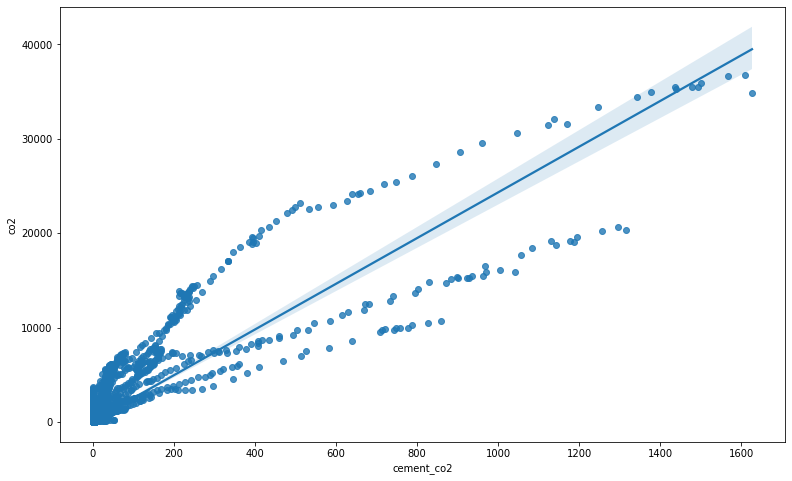

In [29]:
sns.regplot(x= 'cement_co2', y = 'co2', data = df)

plt.gcf().set_size_inches(13, 8)

there are some outliers present with a exponential growth and the graph show a positive correlation between co2 and cement co2

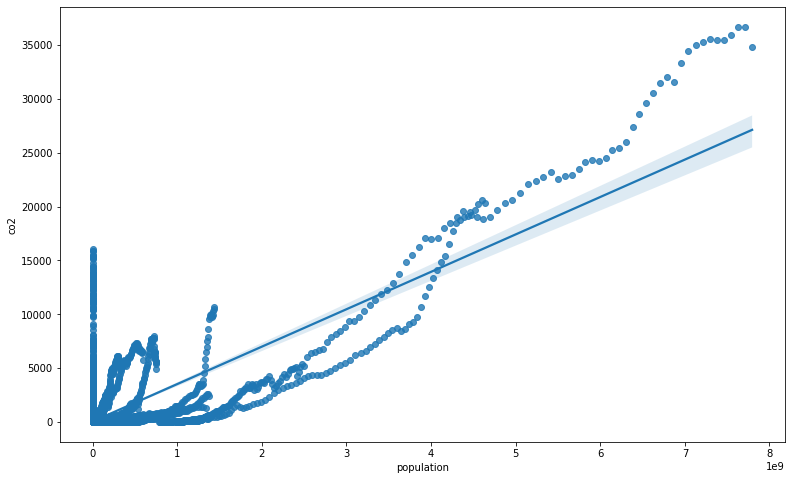

In [30]:
sns.regplot(x= 'population', y = 'co2', data = df)
plt.gcf().set_size_inches(13, 8)

the graph shows us the positive correlation between population and CO2 but we can see a lot of outliers present

In [31]:
data_ghg = df[['co2','total_ghg','population','methane','nitrous_oxide','gdp']].corr()
data_ghg

,co2,total_ghg,population,methane,nitrous_oxide,gdp
co2,1.000000,0.634548,0.774784,0.415963,0.412652,0.365480
total_ghg,0.634548,1.000000,0.614381,0.583280,0.575221,0.509630
population,0.774784,0.614381,1.000000,0.397643,0.390529,0.320605
methane,0.415963,0.583280,0.397643,1.000000,0.994553,0.268315
nitrous_oxide,0.412652,0.575221,0.390529,0.994553,1.000000,0.269418
gdp,0.365480,0.509630,0.320605,0.268315,0.269418,1.000000


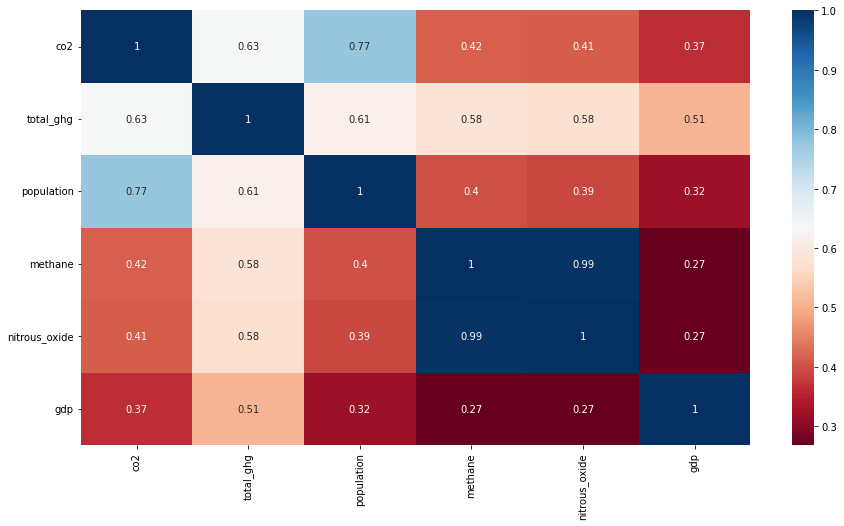

In [32]:
sns.heatmap(data_ghg, cmap = "RdBu", annot = True)
plt.gcf().set_size_inches(15, 8)

From the above heatmap we came into conclusion that total_ghg,methane,co2,nitrous_oxide,population and gdp are positively corelates. 

In [33]:
data_group = df[['country', 'year','co2']]
group_co2 = data_group.groupby(['country','year'],as_index = False).mean()
group_co2

,country,year,co2
0,Afghanistan,1950,0.084
1,Afghanistan,1951,0.092
2,Afghanistan,1952,0.092
3,Afghanistan,1953,0.106
4,Afghanistan,1954,0.106
...,...,...,...
22643,Zimbabwe,2016,10.738
22644,Zimbabwe,2017,9.582
22645,Zimbabwe,2018,11.854
22646,Zimbabwe,2019,10.949


In [34]:
pivot_co2 = group_co2.pivot(index ='country',columns='year')
pivot_co2

co2                                                             \
year          1751   1752   1753   1754   1755    1756   1757    1758    1759   
country                                                                         
Afghanistan    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Africa         NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Albania        NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Algeria        NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Andorra        NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
...            ...    ...    ...    ...    ...     ...    ...     ...     ...   
Vietnam        NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
World        9.351  9.354  9.354  9.358  9.362  10.006  10.01  10.014  10.017   
Yemen          NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Zambia         NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   
Zimbabwe       NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN     NaN   

                     ...                                              \
year           1760  ...       2011       2012       2013       2014   
country              ...                                               
Afghanistan     NaN  ...     12.106     10.219      8.441      7.774   
Africa          NaN  ...   1258.709   1253.144   1260.316   1363.500   
Albania         NaN  ...      5.031      4.668      4.928      5.621   
Algeria         NaN  ...    119.808    128.111    132.435    142.529   
Andorra         NaN  ...      0.491      0.487      0.476      0.462   
...             ...  ...        ...        ...        ...        ...   
Vietnam         NaN  ...    151.231    142.552    149.220    169.006   
World        10.017  ...  34468.451  34974.075  35283.025  35534.443   
Yemen           NaN  ...     20.190     18.268     24.976     24.216   
Zambia          NaN  ...      3.372      4.166      4.416      4.877   
Zimbabwe        NaN  ...      9.744      7.883     11.836     11.906   

                                                                               
year              2015       2016       2017       2018       2019       2020  
country                                                                        
Afghanistan      7.904      6.745      6.860      8.345     12.147     12.160  
Africa        1322.735   1356.719   1384.372   1385.645   1408.479   1326.044  
Albania          4.496      4.492      5.302      4.734      4.863      4.535  
Algeria        149.683    148.929    154.936    161.487    166.642    154.995  
Andorra          0.465      0.469      0.465      0.495      0.502      0.466  
...                ...        ...        ...        ...        ...        ...  
Vietnam        193.004    192.766    195.249    223.718    260.312    254.303  
World        35496.406  35452.459  35925.738  36646.140  36702.503  34807.259  
Yemen           12.806     10.427      9.951      9.984     10.020      9.768  
Zambia           5.098      5.659      6.517      7.313      7.047      6.573  
Zimbabwe        12.226     10.738      9.582     11.854     10.949     10.531  

[228 rows x 270 columns]

In [35]:
gdata_group = df[['country', 'year','total_ghg']]
group_ghg = gdata_group.groupby(['country','year'],as_index = False).mean()
group_ghg

,country,year,total_ghg
0,Afghanistan,1950,0.00
1,Afghanistan,1951,0.00
2,Afghanistan,1952,0.00
3,Afghanistan,1953,0.00
4,Afghanistan,1954,0.00
...,...,...,...
22643,Zimbabwe,2016,116.52
22644,Zimbabwe,2017,116.09
22645,Zimbabwe,2018,118.77
22646,Zimbabwe,2019,0.00


In [36]:
pivot_ghg = group_ghg.pivot(index ='country',columns='year')
pivot_ghg

total_ghg                                               ...  \
year             1751 1752 1753 1754 1755 1756 1757 1758 1759 1760  ...   
country                                                             ...   
Afghanistan       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Africa            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Albania           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Algeria           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Andorra           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Vietnam           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
World             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Yemen             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Zambia            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Zimbabwe          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                                                                         \
year             2011      2012      2013      2014      2015      2016   
country                                                                   
Afghanistan     58.41     66.50     74.55     84.37     93.48     95.53   
Africa           0.00      0.00      0.00      0.00      0.00      0.00   
Albania          8.79      8.40      8.60      9.08      9.01      9.49   
Algeria        179.41    189.38    193.39    203.53    211.46    210.03   
Andorra          0.60      0.60      0.59      0.58      0.58      0.59   
...               ...       ...       ...       ...       ...       ...   
Vietnam        235.82    236.38    248.78    261.78    305.32    330.21   
World        44891.40  45427.61  46047.13  46647.29  46760.47  47413.95   
Yemen           32.39     31.47     38.35     38.81     26.05     22.74   
Zambia          82.69     86.73     88.17     89.04     94.32     93.51   
Zimbabwe        42.04     42.36     42.42     40.84     42.89    116.52   

                                           
year             2017      2018 2019 2020  
country                                    
Afghanistan     97.45     99.08  0.0  0.0  
Africa           0.00      0.00  0.0  0.0  
Albania         10.06      9.84  0.0  0.0  
Algeria        212.33    219.11  0.0  0.0  
Andorra          0.59      0.59  0.0  0.0  
...               ...       ...  ...  ...  
Vietnam        328.33    364.43  0.0  0.0  
World        47990.47  48939.71  0.0  0.0  
Yemen           21.97     21.76  0.0  0.0  
Zambia          93.87     93.23  0.0  0.0  
Zimbabwe       116.09    118.77  0.0  0.0  

[228 rows x 270 columns]

In [37]:
pearson_coef, p_value = sc.stats.pearsonr(df['co2'], df['population'])
print(pearson_coef, p_value)

0.7747842054612464 0.0


as p-value is  < 0.001: we say there is strong evidence that the correlation is significant.

###### `So we came into conclusion from the above analysis`:
    - outliers are present
    - there is significant increase in co2 and ghg emmison every year
    - there is a strong positive correlation between 'total_ghg' and 'co2','total_ghg','population','methane','nitrous_oxide','gdp'] and also in case of 'co2' with 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2',    'population', 'gdp'
    

# CO2 emmission per year by continent

In [38]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1850, end=2020, step=5, value=2020)


In [39]:
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['co2', 'co2_per_capita',],
    button_type='success'
)


In [40]:
df['year'] =   df['year'].astype(int)
idf = df.interactive()


In [41]:
pipeline = continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [42]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
co2_plot

#  Table - CO2 emission over time by continent

In [43]:

co2_pipe = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='co2')  
    .reset_index(drop=True)
)
co2_table = co2_pipe.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
co2_table


pn.extension('tabulator')



# CO2 EMISSION BY INCOME GROUP

In [44]:
income_group = ['High-income countries', 'Low-income countries','Lower-middle-income countries','Upper-middle-income countries']

In [45]:
income_group_co2_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(income_group))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [46]:
co2_incomegroup_bar_plot = income_group_co2_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y=yaxis_co2,
                                                     title='CO2 by income group')
co2_incomegroup_bar_plot

# Co2 vs GDP scatter plot

In [47]:
co2_gdp_scatter_pipeline =(
idf[(idf.year <= year_slider) &
    (~(idf.country.isin(continents)))
    & (~(idf.country.isin(income_group)))
    ].groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)
co2_gdp_scatter_pipeline

In [48]:
co2_gdp_scatter_plot = co2_gdp_scatter_pipeline.hvplot( x ='year',
                                                       y= 'gdp_per_capita',
                                                       by = 'country',
                                                       size=80,
                                                        kind = "scatter",
                                                       alpha=0.7,
                                                       legend=False, 
                                                       height=500, 
                                                       width=500
                                                       title = 'Co2 emmision by year and gdp per capita by country'
                                                        )
co2_gdp_scatter_plot

# Dashboard

In [49]:
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('climate_change.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_incomegroup_bar_plot.panel(width=600), margin=(0,25)), 
                 pn.Column( co2_gdp_scatter_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();